In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
call_911 = pd.read_csv("dataset/Emergency911Calls /911.csv")

In [35]:
call_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [36]:
call_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [38]:
call_911 = call_911.dropna()
call_911["zip"].value_counts().head()

19401.0    45596
19464.0    43902
19403.0    34888
19446.0    32268
19406.0    22456
Name: zip, dtype: int64

In [39]:
call_911["twp"].value_counts().head()

LOWER MERION    47487
ABINGTON        38137
NORRISTOWN      35881
POTTSTOWN       26837
CHELTENHAM      26647
Name: twp, dtype: int64

In [40]:
call_911["title"].nunique()

144

In [41]:
call_911['reason'] = call_911['title'].apply(lambda titles: titles.split(':')[0])
call_911.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS


In [42]:
call_911['reason'].value_counts()

EMS        304785
Traffic    189597
Fire        88817
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

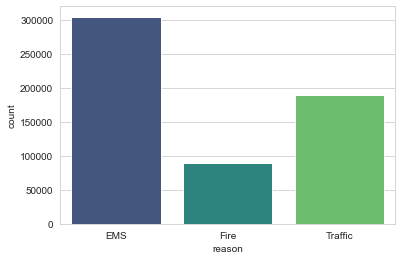

In [43]:
sns.countplot(call_911['reason'],palette = 'viridis')

In [44]:
type(call_911['timeStamp'][0])

str

In [45]:
call_911['timeStamp'] = time = pd.to_datetime(call_911['timeStamp'])
type(call_911['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [46]:
call_911['month'] = call_911['timeStamp'].apply(lambda time: time.month)
call_911['day of week'] = call_911['timeStamp'].apply(lambda time: time.dayofweek)
call_911['hour'] = call_911['timeStamp'].apply(lambda time: time.hour)
call_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,month,day of week,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,12,3,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,3,16
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,12,3,15


In [47]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
call_911['day of week'] = call_911['day of week'].map(dmap)
call_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,month,day of week,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,Thu,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,Thu,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,12,Thu,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,Thu,16
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,12,Thu,15


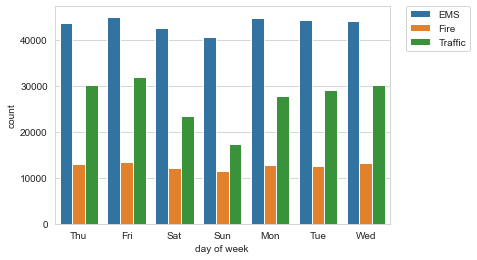

In [49]:
sns.countplot(x = 'day of week', data = call_911, hue = 'reason')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.)

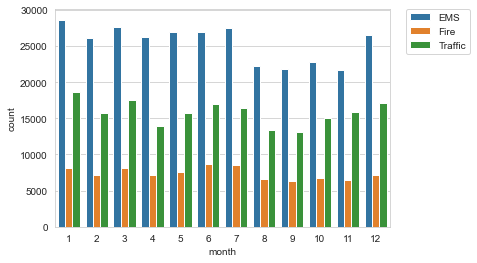

In [50]:
sns.countplot(x = 'month', data = call_911, hue = 'reason')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.)

In [51]:
call_911['date'] = call_911['timeStamp'].apply(lambda times: times.date())
call_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,month,day of week,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,Thu,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,Thu,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,12,Thu,14,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,Thu,16,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,12,Thu,15,2015-12-10


<AxesSubplot:xlabel='hour', ylabel='day of week'>

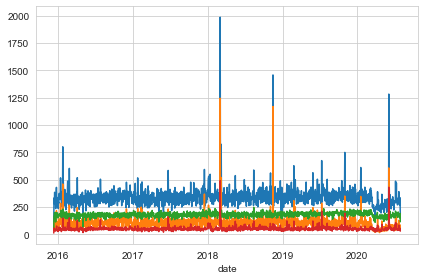

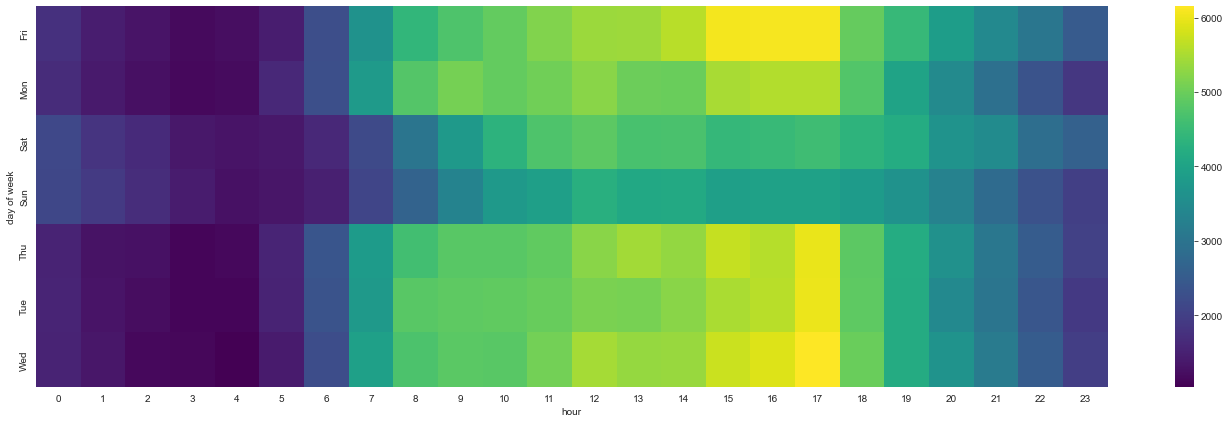

In [52]:
call_911.groupby('date').count()['lat'].plot()
plt.tight_layout()

call_911[call_911['reason'] == 'Traffic'].groupby('date').count()['lat'].plot()
plt.tight_layout()

call_911[call_911['reason'] == 'EMS'].groupby('date').count()['lat'].plot()
plt.tight_layout()

call_911[call_911['reason'] == 'Fire'].groupby('date').count()['lat'].plot()
plt.tight_layout()

dayHour = call_911.groupby(by = ['day of week','hour']).count()['reason'].unstack()
plt.figure(figsize = (24,7))
sns.heatmap(dayHour, cmap = 'viridis')

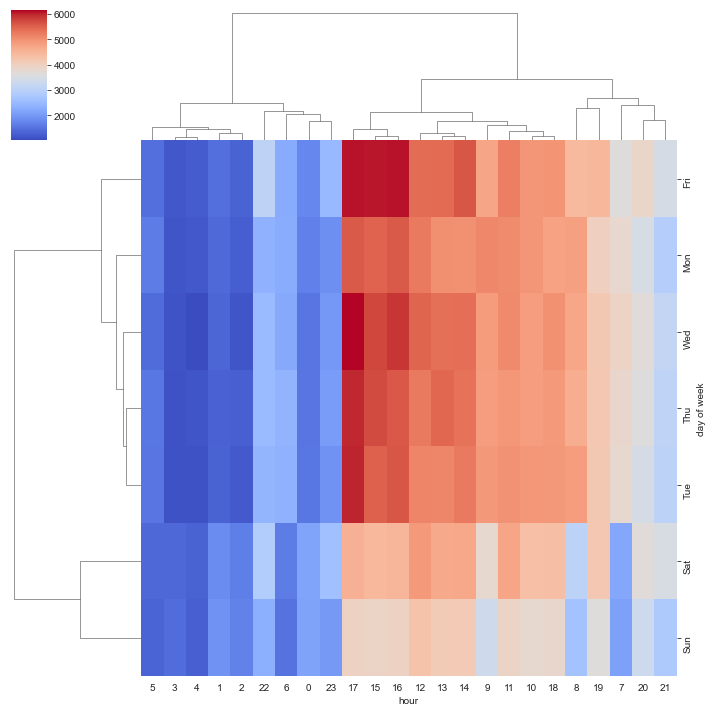

In [53]:
sns.clustermap(dayHour, cmap = 'coolwarm')

In [54]:
daymonth = call_911.groupby(by = ['day of week','month']).count()['reason'].unstack()
daymonth.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day of week,,,,,,,,,,,,
Fri,8235,7291,9739,7014,7810,8016,7621,6424,6685,5938,7366,8189
Mon,7899,7722,7139,7419,6930,7465,8322,6070,5767,7078,5909,7540
Sat,7520,6641,7113,6569,6304,7144,6785,5323,5710,5676,5944,7415
Sun,6617,5711,6020,6053,5826,5964,6878,4565,5153,5493,4562,6392
Thu,8037,7076,7807,6860,7598,8332,7366,6542,6098,6564,7334,7166


<AxesSubplot:xlabel='month', ylabel='day of week'>

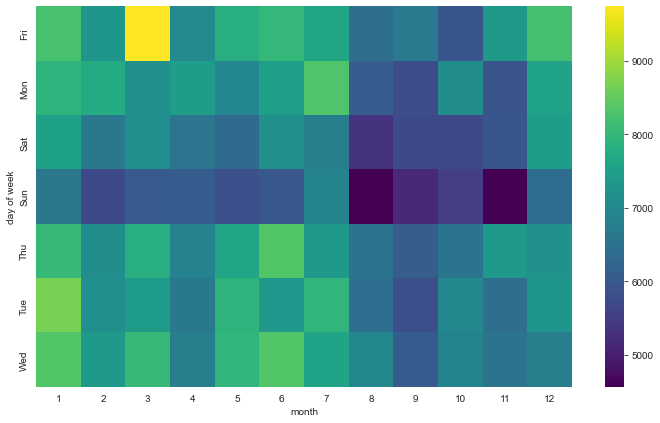

In [55]:
plt.figure(figsize = (12,7))
sns.heatmap(daymonth, cmap = 'viridis')